# [Project 1] 코로나 데이터 분석

---

## 프로젝트 목표
- 서울시 코로나19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 코로나 데이터를 불러오고 Dataframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제<br>
    2.1. 비어있는 column 지우기<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 확진일 데이터 전처리하기<br>
    3.2. 월별 확진자 수 출력<br>
    3.3. 8월 일별 확진자 수 출력<br>
    3.4. 지역별 확진자 수 출력<br>
    3.5. 8월달 지역별 확진자 수 출력<br>
    3.6. 월별 관악구 확진자 수 출력<br>
    3.7. 서울 지역에서 확진자를 지도에 출력<br>

---

## 데이터 출처
-  https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15063273

---

## 프로젝트 개요

2020년 초에 발생한 코로나19 바이러스는 세계적으로 대유행하였고 이에 대한 많은 분석이 이루어지고 있습니다. 유행 초기엔 이를 분석할 데이터가 충분하지 않았지만 6개월 이상 지난 지금은 다양한 데이터 기관에서 코로나 관련 데이터를 공공으로 제공하고 있습니다.

이번 프로젝트에서는 국내 공공데이터 포털에서 제공하는 `서울시 코로나19 확진자 현황` 데이터를 바탕으로 탐색적 데이터 분석을 수행해보겠습니다. 국내 데이터 중 확진자 비율이 제일 높고 사람이 제일 많은 서울시의 데이터를 선정하였으며, 이를 바탕으로 코로나19의 확진 추이 및 환자 특성에 대해서 데이터를 바탕으로 알아봅시다.



---

## 1. 데이터 읽기

필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

### 1.1. 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.
corona_all=pd.read_csv("../rawdata/서울시 코로나19 확진자 현황.csv")

In [4]:
# 상위 5개 데이터를 출력합니다.
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,60663,2021-07-22,NaN,NaN,NaN,종로구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-07-23 11:00,2021-07-23 11:00,Y
1,60662,2021-07-22,NaN,NaN,NaN,관악구,NaN,관악구 소재 사우나 관련(?21.7.),NaN,-,NaN,2021-07-23 11:00,2021-07-23 11:00,Y
2,60661,2021-07-22,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-07-23 11:00,2021-07-23 11:00,Y
3,60660,2021-07-22,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-07-23 11:00,2021-07-23 11:00,Y
4,60659,2021-07-22,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-07-23 11:00,2021-07-23 11:00,Y


In [5]:
# dataframe 정보를 요약하여 출력합니다. 
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60663 entries, 0 to 60662
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      60663 non-null  int64  
 1   확진일     60663 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      60663 non-null  object 
 6   여행력     1366 non-null   object 
 7   접촉력     60663 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      60663 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     60663 non-null  object 
 12  수정일     60663 non-null  object 
 13  노출여부    60663 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 6.5+ MB


---

## 2. 데이터 정제

데이터를 읽고 확인했다면 결측값(missing data), 이상치(outlier)를 처리하는 데이터 정제 과정을 수행하여 봅시다.

### 2.1. 비어있는 column 지우기

`corona_all.info()` 코드를 통하여 `국적`, `환자정보`, `조치사항` 에 해당하는 데이터가 존재하지 않는 것을 알 수 있습니다.

`dataframe.drop()`를 사용하여 불필요한 `국적`, `환자정보`, `조치사항` 의 column 데이터를 삭제하고 이 dataframe을 `corona_del_col`에 저장해 봅시다.

In [6]:
# drop 함수를 사용하여 국적, 환자정보, 조치사항 coulmn 데이터를 삭제합니다.
corona_del_col = corona_all.drop(columns = ['국적','환자정보','조치사항'])

In [7]:
# 정제 처리된 dataframe 정보를 출력합니다.
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60663 entries, 0 to 60662
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      60663 non-null  int64  
 1   확진일     60663 non-null  object 
 2   환자번호    0 non-null      float64
 3   지역      60663 non-null  object 
 4   여행력     1366 non-null   object 
 5   접촉력     60663 non-null  object 
 6   상태      60663 non-null  object 
 7   이동경로    0 non-null      float64
 8   등록일     60663 non-null  object 
 9   수정일     60663 non-null  object 
 10  노출여부    60663 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 5.1+ MB


---

## 3. 데이터 시각화

데이터 정제를 완료한 `corona_del_col` 데이터를 바탕으로 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아봅시다.

### 3.1. 확진일 데이터 전처리하기

`확진일` 데이터를 간단히 출력해보면 `월.일` 형태의 날짜 형식임을 알 수 있습니다.

월별, 일별 분석을 위해서는 문자열 형식의 데이터를 나누어 숫자 형 데이터로 변환해 보겠습니다.

In [8]:
corona_del_col['확진일']

0        2021-07-22
1        2021-07-22
2        2021-07-22
3        2021-07-22
4        2021-07-22
            ...    
60658    2020-01-31
60659    2020-01-30
60660    2020-01-30
60661    2020-01-30
60662    2020-01-24
Name: 확진일, Length: 60663, dtype: object

#### `확진일` 데이터를 `month`, `day` 데이터로 나누기

`확진일`에 저장된 문자열 데이터를 나누어 `month`, `day` column에 int64 형태로 저장해 봅시다.

In [19]:
# dataframe에 추가하기 전, 임시로 데이터를 저장해 둘 list를 선언합니다.
month = []
day = []

for data in corona_del_col['확진일']:
    # split 함수를 사용하여 월, 일을 나누어 list에 저장합니다.
    month.append(data.split('-')[1].replace('0', ''))
    day.append(data.split('-')[2])

In [20]:
# corona_del_col에 `month`, `day` column을 생성하며 동시에 list에 임시 저장된 데이터를 입력합니다.
corona_del_col['month'] = month
corona_del_col['day'] = day

corona_del_col['month'].astype('int64')
corona_del_col['day'].astype('int64')

0        22
1        22
2        22
3        22
4        22
         ..
60658    31
60659    30
60660    30
60661    30
60662    24
Name: day, Length: 60663, dtype: int64

### 3.2. 월별 확진자 수 출력

나누어진 `month`의 데이터를 바탕으로 달별 확진자 수를 막대그래프로 출력해 보겠습니다.

In [21]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
order = []
for i in range(1,11):
    order.append(str(i))

order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

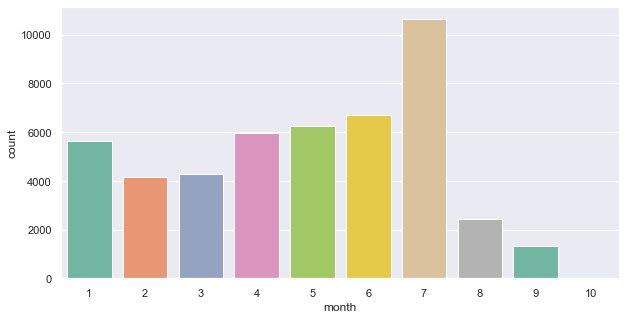

In [22]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=corona_del_col, palette="Set2", order = order)

<AxesSubplot:>

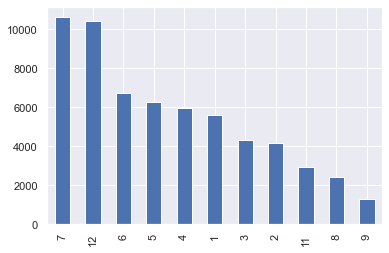

In [23]:
# series의 plot 함수를 사용한 출력 방법도 있습니다.
corona_del_col['month'].value_counts().plot(kind='bar')

In [24]:
# value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수입니다.
corona_del_col['month'].value_counts()

7     10623
12    10432
6      6716
5      6259
4      5960
1      5618
3      4289
2      4141
11     2904
8      2415
9      1306
Name: month, dtype: int64

### 3.3. 8월달 일별 확진자 수 출력

월별 확진자 수를 출력해보면 알 수 있듯이 8월에 확진자 수가 가장 많았습니다.

이번엔 8월 동안 확진자 수가 어떻게 늘었는지 일별 확진자 수를 막대그래프로 출력해 봅시다.

In [25]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
order2 = []
for i in range(1,32):
    
    order2.append(str(i))

order2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

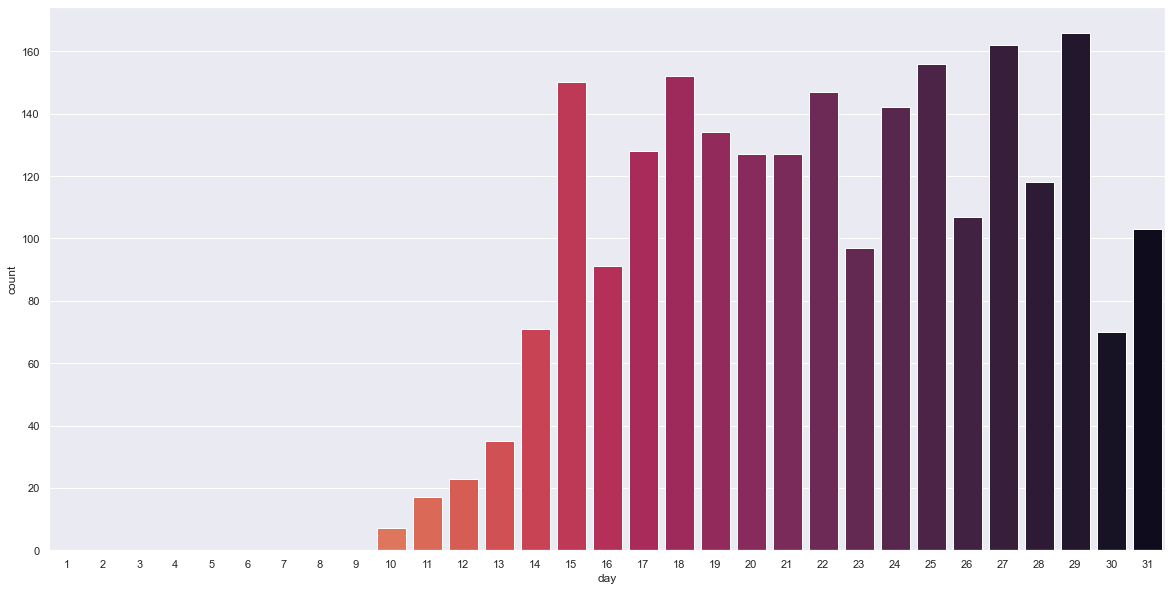

In [26]:
# seaborn의 countplot 함수를 사용하여 출력합니다.
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data=corona_del_col[corona_del_col['month'] == '8'], palette="rocket_r", order = order2)

#### 퀴즈 1. 8월 평균 일별 확진자 수를 구하세요. (8월 총 확진자/31일)

In [27]:
corona_del_col[corona_del_col['month'] == '8']['day'].count()/31
corona_del_col[corona_del_col['month'] == '8']['day'].value_counts().mean()

77.90322580645162

### 3.4. 지역별 확진자 수 출력

`지역` 데이터를 간단히 출력해보면 `oo구` 형태의 문자열 데이터임을 알 수 있습니다.

In [29]:
corona_del_col['지역']

0        종로구
1        관악구
2        성북구
3        성북구
4        성북구
        ... 
60658    성북구
60659    마포구
60660    종로구
60661    중랑구
60662    강서구
Name: 지역, Length: 60663, dtype: object

이번에는 지역별로 확진자가 얼마나 있는지 막대그래프로 출력해 봅시다.

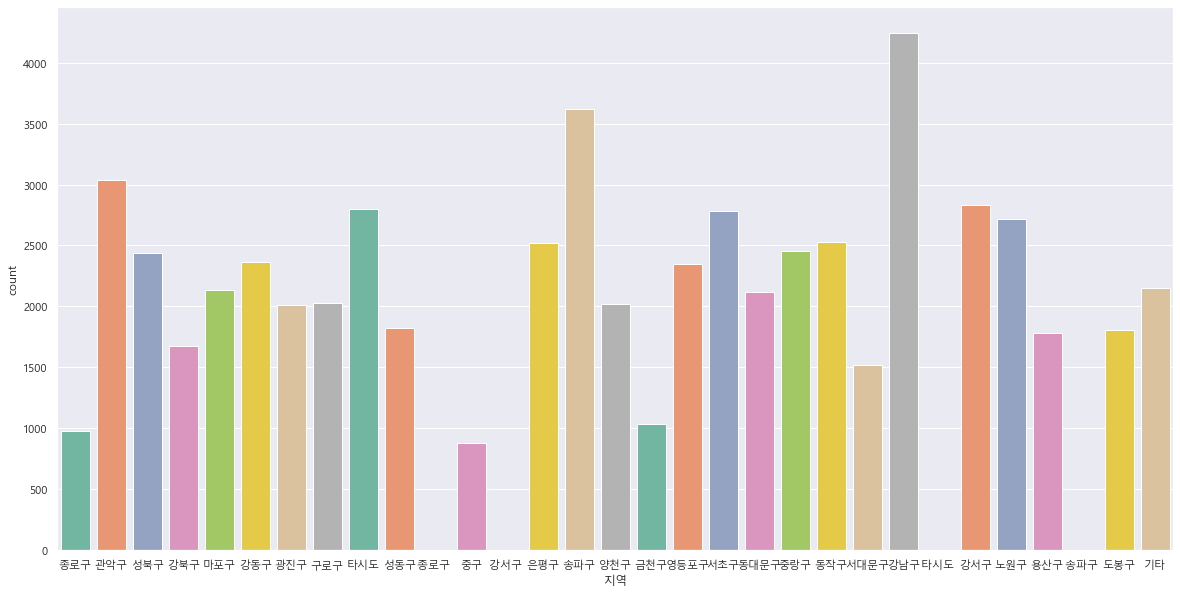

In [35]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_del_col, palette="Set2")

#### 지역 이상치 데이터 처리

위의 출력된 데이터를 보면 `종랑구`라는 잘못된 데이터와 `한국`이라는 지역과는 맞지 않는 데이터가 있음을 알 수 있습니다.

기존 지역 데이터 특성에 맞도록 `종랑구` -> `중랑구`, `한국` -> `기타`로 데이터를 변경해 봅시다.

In [36]:
# replace 함수를 사용하여 해당 데이터를 변경합니다.
# 이상치가 처리된 데이터이기에 새로운 Dataframe으로 저장합니다.
corona_out_region = corona_del_col.replace({'종랑구':'중랑구', '한국':'기타'})

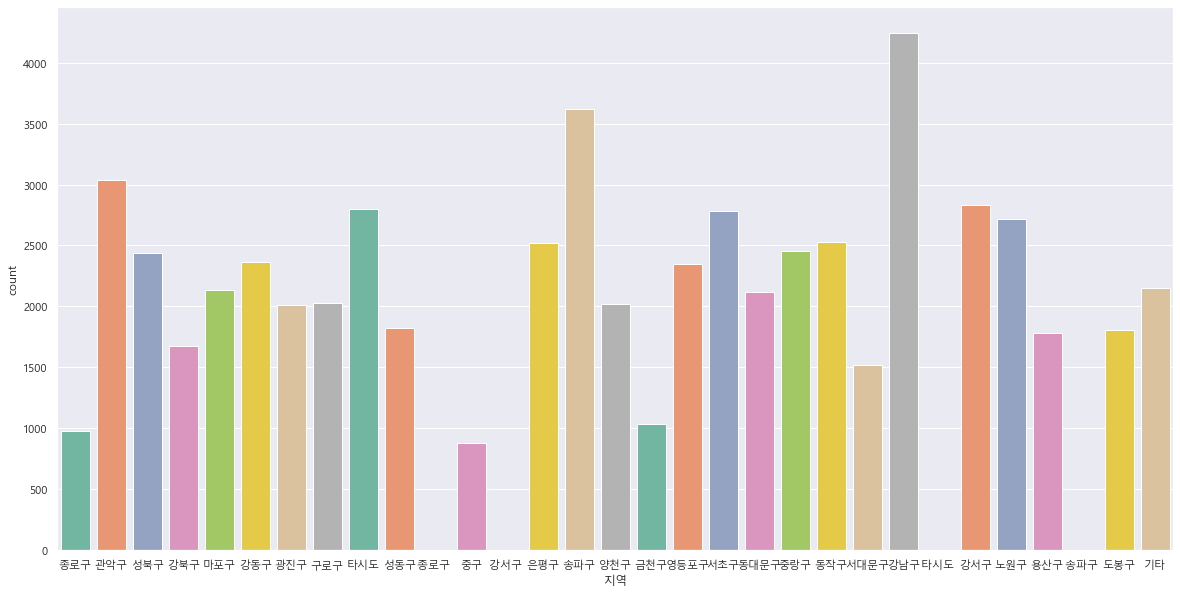

In [38]:
# 이상치가 처리된 데이터를 다시 출력해 봅시다.
plt.figure(figsize=(20,10))
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region, palette="Set2")

### 3.5. 8월달 지역별 확진자 수 출력

감염자가 많았던 8월에는 지역별로 확진자가 어떻게 분포되어 있는지 막대그래프로 출력해 봅시다.

In [39]:
# 논리연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있습니다.
corona_out_region[corona_del_col['month'] == '8']

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
53770,6893,2020-08-25,NaN,기타,NaN,감염경로 조사중,사망,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,25
56186,4477,2020-08-31,NaN,타시도,NaN,감염경로 조사중,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,31
56187,4476,2020-08-25,NaN,타시도,NaN,성북구 사랑제일교회 관련,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,25
56188,4475,2020-08-26,NaN,타시도,NaN,타시도 확진자 접촉,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,26
56189,4474,2020-08-27,NaN,타시도,NaN,기타 확진자 접촉,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59055,1608,2020-08-02,NaN,용산구,아시아,해외유입,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,02
59056,1607,2020-08-01,NaN,양천구,NaN,기타 확진자 접촉,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,01
59057,1606,2020-08-01,NaN,종로구,NaN,종로구 지인모임 (신명투자),퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,01
59059,1604,2020-08-01,NaN,강서구,NaN,강서구 요양시설 관련,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y,8,01


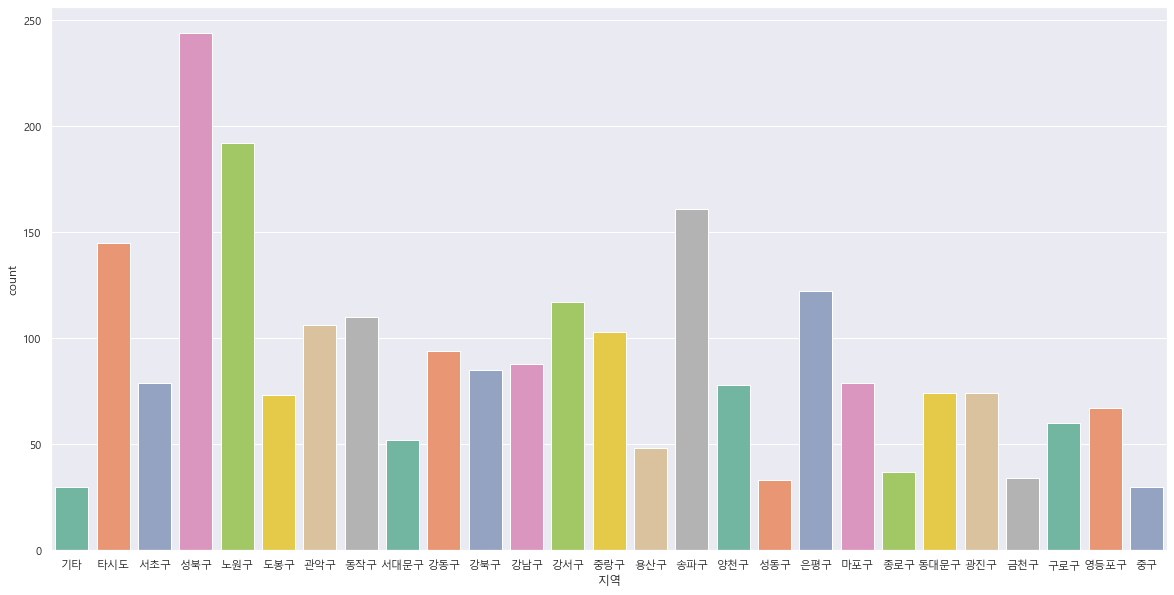

In [41]:
# 그래프를 출력합니다.
plt.figure(figsize=(20,10))
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region[corona_del_col['month'] == '8'], palette="Set2")

### 3.6. 월별 관악구 확진자 수 출력

이번에는 확진자가 가장 많았던 관악구 내의 확진자 수가 월별로 어떻게 증가했는지 그 분포를 막대그래프로 출력해 봅시다.

In [42]:
# 해당 column을 지정하여 series 형태로 출력할 수 있습니다.
corona_out_region['month'][corona_out_region['지역'] == '관악구']

1        7
19       7
31       7
39       7
77       7
        ..
60545    3
60576    2
60589    2
60610    2
60626    2
Name: month, Length: 3041, dtype: object

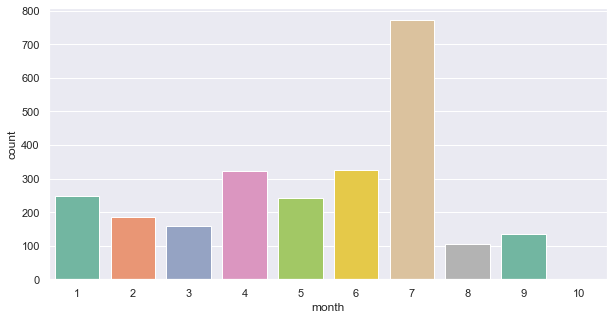

In [43]:
# 그래프를 출력합니다.
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=corona_out_region[corona_out_region['지역'] == '관악구'], palette="Set2", order = order)

### 3.7. 서울 지역에서 확진자를 지도에 출력

지도를 출력하기 위한 라이브러리로 folium을 사용해 봅시다.

In [48]:
# 지도 출력을 위한 라이브러리 folium을 import 합니다.
import folium

# Map 함수를 사용하여 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_osm

지역마다 지도에 정보를 출력하기 위해서는 각 지역의 좌표정보가 필요합니다.

이를 해결하기 위해서 서울시 행정구역 시군 정보 데이터를 불러와 사용합니다.

데이터 출처: https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [28]:
# CRS에 저장합니다.
CRS=pd.read_csv("../rawdata/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")

In [29]:
# Dataframe을 출력해 봅니다.
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


저장된 데이터에서 지역명이 서울의 중심지 `중구`인 데이터를 뽑아봅시다.

In [30]:
CRS[CRS['시군구명_한글'] == '중구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
11,12,11140,중구,Jung-gu,11,37.557945,126.99419


이제 for 문을 사용하여 지역마다 확진자를 원형 마커를 사용하여 지도에 출력해 봅시다.

In [31]:
# corona_out_region의 지역에는 'oo구' 이외로 `타시도`, `기타`에 해당되는 데이터가 존재 합니다.
# 위 데이터에 해당되는 위도, 경도를 찾을 수 없기에 삭제하여 corona_seoul로 저장합니다.
corona_seoul = corona_out_region.drop(corona_out_region[corona_out_region['지역'] == '타시도'].index)
corona_seoul = corona_seoul.drop(corona_out_region[corona_out_region['지역'] == '기타'].index)

# 서울 중심지 중구를 가운데 좌표로 잡아 지도를 출력합니다.
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=11)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 뽑아냅니다.
for region in set(corona_seoul['지역']):

    # 해당 지역의 데이터 개수를 count에 저장합니다.
    count = len(corona_seoul[corona_seoul['지역'] == region])
    # 해당 지역의 데이터를 CRS에서 뽑아냅니다.
    CRS_region = CRS[CRS['시군구명_한글'] == region]

    # CircleMarker를 사용하여 지역마다 원형마커를 생성합니다.
    marker = folium.CircleMarker([CRS_region['위도'], CRS_region['경도']], # 위치
                                  radius=count/10 + 10,                 # 범위
                                  color='#3186cc',            # 선 색상
                                  fill_color='#3186cc',       # 면 색상
                                  popup=' '.join((region, str(count), '명'))) # 팝업 설정
    
    # 생성한 원형마커를 지도에 추가합니다.
    marker.add_to(map_osm)

map_osm

#### 퀴즈 2. 6월에 확진자가 가장 많이 나온 지역을 구하세요.

In [32]:
# corona_out_region[corona_del_col['month'] == '6']['지역'].value_counts()

In [33]:
# 6월에 확진자가 가장 많이 나온 지역을 구하여 quiz_2 변수에 저장합니다.
# 문자형으로 저장합니다.
quiz_2 = None

 ---

## 제출하기

퀴즈 1번과 2번을 수행 후, 아래 코드를 실행하면 `quiz_1 ~ 2` 변수가 저장된 csv 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [34]:
d = {'quiz_1': [quiz_1], 'quiz_2': [quiz_2]}
df_quiz = pd.DataFrame(data=d)
df_quiz.to_csv("submission.csv",index=False)

In [35]:
answer=pd.read_csv('submission.csv')
answer.loc[0]['quiz_2']

nan

In [36]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [ ]:
# 제출 파일 업로드
await upload()

In [ ]:
# 채점 수행
await check_score()

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>